In [1]:
#first value is y_true and second value is y_pred for functions
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
import math

from datetime import datetime, timedelta
from datetime import datetime, timezone
from dateutil.tz import tzutc, tzlocal

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [2]:
df = pd.read_csv('2018-04-14_2018-04-17GSSHA_rain_gagesfilled_NA.csv')
df_na = pd.read_csv('2018-04-14_2018-04-17GSSHA_rain_gages.csv')

In [3]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df_na['DateTime'] = pd.to_datetime(df_na['DateTime'])

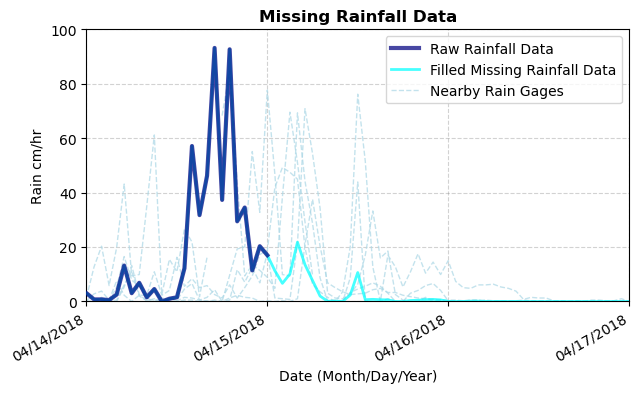

In [35]:
#creat subplot
fig, ax = plt.subplots(figsize=(7,4))

#make the dates look diagonal and pretty
fig.autofmt_xdate()

#create two plots the ',' is for used on the legend
a, = ax.plot(df_na['DateTime'], df_na['HI-45'], linewidth = 3, alpha=0.72, zorder=4, c= 'navy') #marker ='.', c='lime', edgecolor='black', linewidth = 0.5, s=40)
b, = ax.plot(df['DateTime'], df['HI-45'], linewidth = 2, alpha=0.72, zorder=3, c = 'cyan')
c, = ax.plot(df['DateTime'], df['PRIH1'], linewidth = 1, alpha=0.72, zorder=2, c = 'lightblue', linestyle = '--')
d,= ax.plot(df['DateTime'], df['USC00514561'], linewidth = 1, alpha=0.72, zorder=2, c = 'lightblue', linestyle ='--')
e,= ax.plot(df['DateTime'], df['USC00518165'], linewidth = 1, alpha=0.72, zorder=2, c = 'lightblue', linestyle ='--')
# e,USGS_uv220427159300201
f = ax.plot(df['DateTime'], df['USGS_uv220427159300201'], linewidth = 1, alpha=0.72, zorder=2, c = 'lightblue', linestyle ='--')
g = ax.plot(df['DateTime'], df['HI-41'], linewidth = 1, alpha=0.72, zorder=2, c = 'lightblue', linestyle ='--')


#create a pretty grid
plt.rc('axes', axisbelow=True)
ax.grid(True, color='gray', linestyle='dashed', alpha = 0.35)

#set x axis to margins and y axis to 0-650
ax.margins(x=0)
ax.set_ylim([0, 100])

#add legend, lebels, and text
ax.legend([a, b, c], ['Raw Rainfall Data','Filled Missing Rainfall Data', 'Nearby Rain Gages'])
ax.set_title('Missing Rainfall Data', fontweight="bold")
ax.set_xlabel('Date (Month/Day/Year)')
ax.set_ylabel('Rain cm/hr')
#ax.text(0.023, 0.78, '\nRMSE: ' + str(rmse) + '\nNSE: ' + str(nse), size=9, ha="left", 
         #transform=ax.transAxes,
       #bbox=dict(facecolor='white'))
#ax.set_ylim(0, merged_dataframe['metric_discharge_cms'].max() +2000)

#configure datetime axis
myFmt = DateFormatter("%m-%d-%y")
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
ax.xaxis.set_major_locator(mdates.DayLocator())

#save figure
plt.savefig('AGU.png')

#return (ax)